# House Price prediction in KSA

In [1]:
#Import Libraries
import pandas as pd
from pandas.plotting import andrews_curves
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline  
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import KFold
from sklearn import metrics
from statsmodels.tools.eval_measures import mse
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.exceptions import ConvergenceWarning
import math 
import warnings
from scipy import stats
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE









In [2]:
#Load data
data =pd.read_csv('SA_Aqar 1.csv')

In [3]:
data.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,0.0,1,0,1,1,0.0,0,80000
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,0.0,1,0,0,1,0.0,0,60000
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,0,1,0.0,1,0,0,1,0.0,0,60000
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,0.0,1,0,0,0,0.0,0,55000
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,0,1,0.0,1,0,1,1,0.0,0,70000


In [4]:
data.shape

(3718, 23)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
size,3718.0,390.968531,1565.056135,1.0,280.0,330.0,400.0,95000.0
property_age,3718.0,5.064820,7.590427,0.0,0.0,2.0,7.0,36.0
bedrooms,3718.0,5.083916,1.230040,1.0,4.0,5.0,6.0,7.0
bathrooms,3718.0,4.606509,0.703449,1.0,4.0,5.0,5.0,5.0
livingrooms,3718.0,2.243948,0.916436,1.0,2.0,2.0,3.0,5.0
kitchen,3718.0,0.909360,0.287135,0.0,1.0,1.0,1.0,1.0
garage,3718.0,0.802044,0.398512,0.0,1.0,1.0,1.0,1.0
driver_room,3718.0,0.495697,0.500049,0.0,0.0,0.0,1.0,1.0
maid_room,3718.0,0.795320,0.403522,0.0,1.0,1.0,1.0,1.0
furnished,3718.0,0.123453,0.329001,0.0,0.0,0.0,0.0,1.0


# Data Preproccessing

# 1. Full missing value

<Axes: >

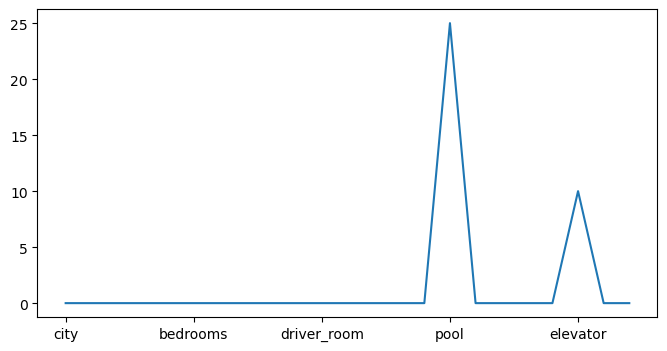

In [6]:
# plot the data to check if there is a null value
plt.figure(figsize=(8,4))
data.isnull().sum().plot()

In [7]:
#fill missing value
data['pool'].fillna(data['pool'].mean(),inplace=True)
data['elevator'].fillna(data['elevator'].mean(),inplace=True)

In [8]:
# check if there is a missing value
data.isnull().sum()

city            0
district        0
front           0
size            0
property_age    0
bedrooms        0
bathrooms       0
livingrooms     0
kitchen         0
garage          0
driver_room     0
maid_room       0
furnished       0
ac              0
roof            0
pool            0
frontyard       0
basement        0
duplex          0
stairs          0
elevator        0
fireplace       0
price           0
dtype: int64

# 2. Handling Catogorical Variable

In [9]:
data['city'].unique()

array([' الرياض', ' جدة', ' الدمام', ' الخبر'], dtype=object)

In [10]:
data['front'].unique()

array(['شمال', 'جنوب', 'غرب', 'شرق', 'جنوب شرقي', 'جنوب غربي',
       'شمال غربي', 'شمال شرقي', '3 شوارع', '4 شوارع'], dtype=object)

In [11]:
data['district'].unique()

array(['   حي العارض ', '   حي القادسية ', '   حي المعيزلة ',
       '   حي العليا ', '   حي الازدهار ', '   حي المهدية ',
       '   حي الحزم ', '   حي الصحافة ', '   حي بنبان ',
       '   حي النسيم الغربي ', '   حي النرجس ', '   حي الملز ',
       '   حي الياسمين ', '   حي المونسية ', '   حي السليمانية ',
       '   حي العقيق ', '   حي المرسلات ', '   حي الرحمانية ',
       '   حي الرمال ', '   حي طويق ', '   حي الملقا ', '   حي النزهة ',
       '   حي الربيع ', '   حي ظهرة لبن ', '   حي الروضة ', '   حي عكاظ ',
       '   حي الورود ', '   حي الفيحاء ', '   حي النموذجية ',
       '   حي الربوة ', '   حي القيروان ', '   حي عليشة ',
       '   حي الملك فيصل ', '   حي حطين ', '   حي المناخ ',
       '   حي البديعة ', '   حي الشهداء ', '   حي قرطبة ',
       '   حي العريجاء الغربية ', '   حي النفل ', '   حي القدس ',
       '   حي الملك فهد ', '   حي العزيزية ', '   حي الواحة ',
       '   حي النسيم الشرقي ', '   حي المصيف ', '   حي الزهرة ',
       '   حي اليرموك ', '   حي الملك عبدالله

In [12]:
enc = OrdinalEncoder()

In [13]:
enc.fit_transform(data[['city']])


array([[2.],
       [2.],
       [2.],
       ...,
       [0.],
       [0.],
       [0.]])

In [14]:
enc.fit_transform(data[['front']])

array([[6.],
       [2.],
       [2.],
       ...,
       [9.],
       [2.],
       [9.]])

In [15]:
data[['city']]=enc.fit_transform(data[['city']])
data[['front']]=enc.fit_transform(data[['front']])

In [16]:
data.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
0,2.0,حي العارض,6.0,250,0,5,5,1,1,1,...,0,0,0.0,1,0,1,1,0.0,0,80000
1,2.0,حي القادسية,2.0,370,0,4,5,2,1,1,...,0,0,0.0,1,0,0,1,0.0,0,60000
2,2.0,حي القادسية,2.0,380,0,4,5,1,1,1,...,0,1,0.0,1,0,0,1,0.0,0,60000
3,2.0,حي المعيزلة,9.0,250,0,5,5,3,0,1,...,0,0,0.0,1,0,0,0,0.0,0,55000
4,2.0,حي العليا,9.0,400,11,7,5,2,1,1,...,0,1,0.0,1,0,1,1,0.0,0,70000


In [17]:
label_encoder = LabelEncoder()

In [18]:
data['district'] = label_encoder.fit_transform(data['district'])

In [19]:
data.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
0,2.0,79,6.0,250,0,5,5,1,1,1,...,0,0,0.0,1,0,1,1,0.0,0,80000
1,2.0,92,2.0,370,0,4,5,2,1,1,...,0,0,0.0,1,0,0,1,0.0,0,60000
2,2.0,92,2.0,380,0,4,5,1,1,1,...,0,1,0.0,1,0,0,1,0.0,0,60000
3,2.0,109,9.0,250,0,5,5,3,0,1,...,0,0,0.0,1,0,0,0,0.0,0,55000
4,2.0,86,9.0,400,11,7,5,2,1,1,...,0,1,0.0,1,0,1,1,0.0,0,70000


# Outlier Detection & removal

<Axes: xlabel='price', ylabel='Density'>

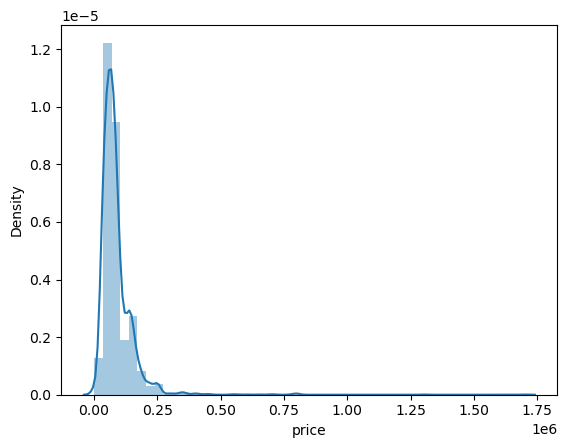

In [20]:
# to remove the oulier we have check the skew
sns.distplot(data['price'])

In [21]:
print(data['price'].describe())

count    3.718000e+03
mean     8.738797e+04
std      7.063470e+04
min      1.000000e+03
25%      5.500000e+04
50%      7.000000e+04
75%      1.000000e+05
max      1.700000e+06
Name: price, dtype: float64


In [22]:
log_price=np.log1p(data['price'])

<Axes: xlabel='price', ylabel='Density'>

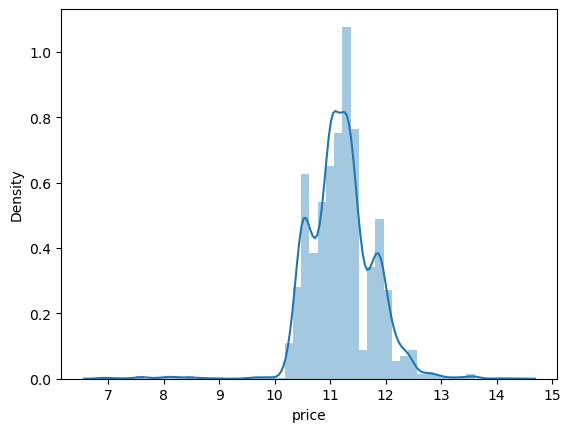

In [23]:
sns.distplot(log_price)

In [24]:
print(log_price.quantile(0.10),log_price.quantile(0.95))

10.518700218288165 12.100717685412471


In [25]:
log_price.skew(),data.price.skew()

(-0.6288738405237501, 7.690328048240684)

In [26]:
z_score = np.abs(stats.zscore(log_price))

In [27]:
np.where(z_score>3)

(array([ 131,  168,  257,  272,  307,  321,  394,  417,  490,  535,  761,
         773,  779,  787,  801,  831,  858,  901,  917,  934,  950, 1100,
        1116, 1149, 1157, 1161, 1168, 1170, 1192, 1202, 1206, 1225, 1250,
        1255, 1263, 1323, 1371, 1913, 1953, 1971, 1974], dtype=int64),)

In [28]:
remove_outliers = data.loc[z_score<=3]

In [29]:
print('old data', len(data))
print('new data', len(remove_outliers))
print('Ourlires' , len(data)-len(remove_outliers))

old data 3718
new data 3677
Ourlires 41


In [30]:
data = remove_outliers.copy()

In [31]:
data['log_price'] = log_price

In [32]:
drop_price =data.drop(['price'], axis=1)

In [33]:
data = data = drop_price.copy()

In [34]:
data

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,log_price
0,2.0,79,6.0,250,0,5,5,1,1,1,...,0,0,0.000000,1,0,1,1,0.0,0,11.289794
1,2.0,92,2.0,370,0,4,5,2,1,1,...,0,0,0.000000,1,0,0,1,0.0,0,11.002117
2,2.0,92,2.0,380,0,4,5,1,1,1,...,0,1,0.000000,1,0,0,1,0.0,0,11.002117
3,2.0,109,9.0,250,0,5,5,3,0,1,...,0,0,0.000000,1,0,0,0,0.0,0,10.915107
4,2.0,86,9.0,400,11,7,5,2,1,1,...,0,1,0.000000,1,0,1,1,0.0,0,11.156265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,0.0,97,9.0,437,0,7,5,2,1,1,...,0,1,0.000000,1,0,1,1,0.0,1,11.002117
3714,0.0,77,2.0,400,0,5,5,3,0,1,...,1,1,0.163282,1,0,1,1,0.0,0,10.915107
3715,0.0,97,9.0,330,0,6,4,2,1,0,...,0,1,0.163282,1,0,1,0,0.0,1,10.518700
3716,0.0,96,2.0,300,13,6,5,2,1,1,...,1,0,0.000000,1,0,1,1,0.0,0,11.407576


# Balance the data

<Axes: >

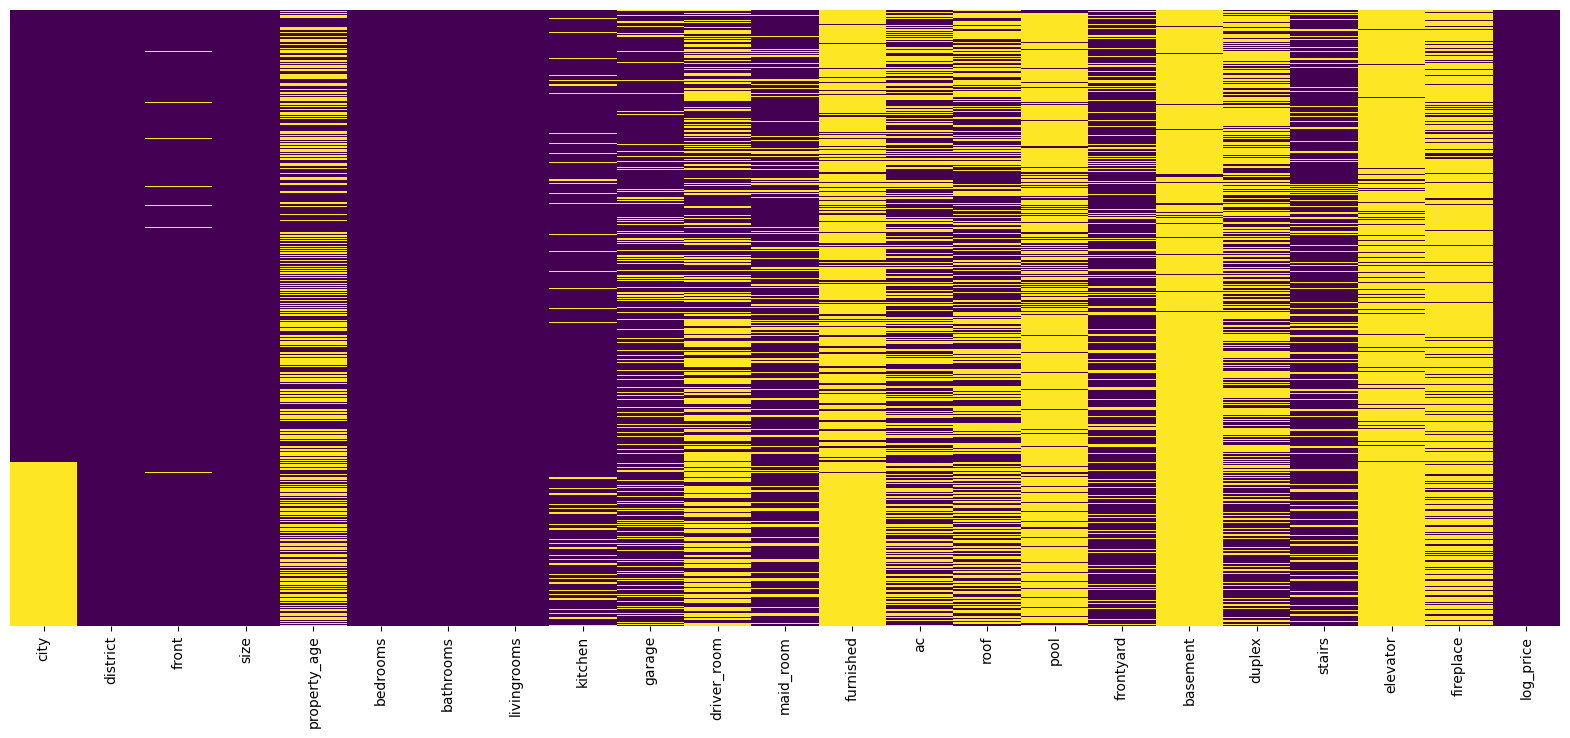

In [35]:
# Dropping Column with 0's more than the 60%
plt.figure(figsize=(20,8))
sns.heatmap(data.isin([0]),  yticklabels = False,cbar = False, cmap = 'viridis')

In [36]:
data = data.loc[:, data.isin([0]).mean() < .6]

# scaling dataset

In [37]:
# create a scaler object
scaler = MinMaxScaler()

In [38]:
# fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(data)

In [39]:
# create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

In [40]:
# print the scaled data
data = scaled_df.copy()

In [41]:
data

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,ac,roof,frontyard,duplex,stairs,log_price
0,0.666667,0.456647,0.666667,0.002621,0.000000,0.666667,1.00,0.00,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.512451
1,0.666667,0.531792,0.222222,0.003884,0.000000,0.500000,1.00,0.25,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.427868
2,0.666667,0.531792,0.222222,0.003990,0.000000,0.500000,1.00,0.00,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.427868
3,0.666667,0.630058,1.000000,0.002621,0.000000,0.666667,1.00,0.50,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.402285
4,0.666667,0.497110,1.000000,0.004200,0.305556,1.000000,1.00,0.25,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.473190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3672,0.000000,0.560694,1.000000,0.004590,0.000000,1.000000,1.00,0.25,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.427868
3673,0.000000,0.445087,0.222222,0.004200,0.000000,0.666667,1.00,0.50,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.402285
3674,0.000000,0.560694,1.000000,0.003463,0.000000,0.833333,0.75,0.25,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.285733
3675,0.000000,0.554913,0.222222,0.003147,0.361111,0.833333,1.00,0.25,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.547081


# Feature selection

In [42]:
X=data.drop(['log_price'] , axis=1 )
y=data['log_price']

In [43]:
# Perform feature selection based on top K features
k = 15 # Select the top 15 features
selector = SelectKBest(f_regression, k=k)
selector.fit(X, y)

SelectKBest(k=15, score_func=<function f_regression at 0x000002165BB0A050>)

In [44]:
# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

In [45]:
# Get the names of the selected features
feature_names = X.columns[selected_features]
print("Selected features: ")
print(feature_names)

Selected features: 
Index(['city', 'district', 'front', 'property_age', 'bedrooms', 'bathrooms',
       'livingrooms', 'kitchen', 'garage', 'driver_room', 'maid_room', 'ac',
       'frontyard', 'duplex', 'stairs'],
      dtype='object')


#  Train and Test sets

In [46]:
# Update the data with just the selected features
X_selected = X.iloc[:, selected_features]
y_selected = y


In [47]:
X = X_selected.copy()
y = y_selected.copy()

In [43]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)).mean()
    return rmse


def evaluation(y, predictions):
    r_squared =metrics.r2_score(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = math.sqrt(mean_squared_error(y, predictions))
    mae = mean_absolute_error(y, predictions)
    return r_squared, mse, rmse, mae

In [45]:
models = pd.DataFrame(columns=["Model","R2 Score","MSE","RMSE","MAE" ,"RMSE (Cross-Validation)"])

# Random Forest

In [46]:
#buliding the model
ran_reg = RandomForestRegressor(n_estimators=42, random_state=100, min_samples_leaf = 2, min_samples_split=2 , )
ran_reg.fit(X_train, y_train)
predictions = ran_reg.predict(X_test)

r_squared, mse, rmse, mae  = evaluation(y_test, predictions)
print("R2 Score:", r_squared)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
rmse_cross_val = rmse_cv(ran_reg)
print("RMSE Cross-Validation:", rmse_cross_val)
print("-"*30)

new_row = {"Model": "Random Forest", "R2 Score": r_squared , "MSE": mse, "RMSE": rmse, "MAE": mae , "RMSE (Cross-Validation)":rmse_cross_val }
models = models.append(new_row, ignore_index=True)

R2 Score: 0.8095732480009251
MSE: 0.004202847670528876
RMSE: 0.06482937351639978
MAE: 0.030215804530760382
RMSE Cross-Validation: 0.05456006888840973
------------------------------


# XGBoost

In [47]:
xgbr = XGBRegressor(learning_rate=0.1 , gamma=0.1, n_estimators=100 ,  subsample=0.9, max_depth=8 )
xgbr.fit(X_train, y_train)
predictions = xgbr.predict(X_test)

r_squared, mse, rmse,mae = evaluation(y_test, predictions)
print("R2 Score:", r_squared)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
rmse_cross_val = rmse_cv(xgbr)
print("RMSE Cross-Validation:", rmse_cross_val)
print("-"*30)
new_row = {"Model": "XGboost", "R2 Score": r_squared , "MSE": mse, "RMSE": rmse, "MAE": mae , "RMSE (Cross-Validation)":rmse_cross_val }

models = models.append(new_row, ignore_index=True)

R2 Score: 0.7991359269402329
MSE: 0.004433206430766015
RMSE: 0.06658232821677247
MAE: 0.03997341124854896
RMSE Cross-Validation: 0.06304162537965481
------------------------------


# Decision Tree

In [48]:
Dec_reg = DecisionTreeRegressor(max_depth=7, min_samples_split=2, min_samples_leaf=2 )
Dec_reg.fit(X_train, y_train)
predictions = Dec_reg.predict(X_test)

r_squared, mse, rmse,mae = evaluation(y_test, predictions)
print("R2 Score:", r_squared)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
rmse_cross_val = rmse_cv(Dec_reg)
print("RMSE Cross-Validation:", rmse_cross_val)
print("-"*30)
new_row = {"Model": "Decision Tree", "R2 Score": r_squared , "MSE": mse, "RMSE": rmse, "MAE": mae , "RMSE (Cross-Validation)":rmse_cross_val }

models = models.append(new_row, ignore_index=True)

R2 Score: 0.6704811031267156
MSE: 0.007272705717975259
RMSE: 0.08528016016621486
MAE: 0.04594822447072703
RMSE Cross-Validation: 0.07521047489434804
------------------------------


In [54]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,R2 Score,MSE,RMSE,MAE,RMSE (Cross-Validation)
0,Random Forest,0.787881,0.004682,0.068422,0.032558,0.057102
1,XGboost,0.785895,0.004725,0.068742,0.042328,0.065066
2,Decision Tree,0.716151,0.006265,0.079150,0.042375,0.074362


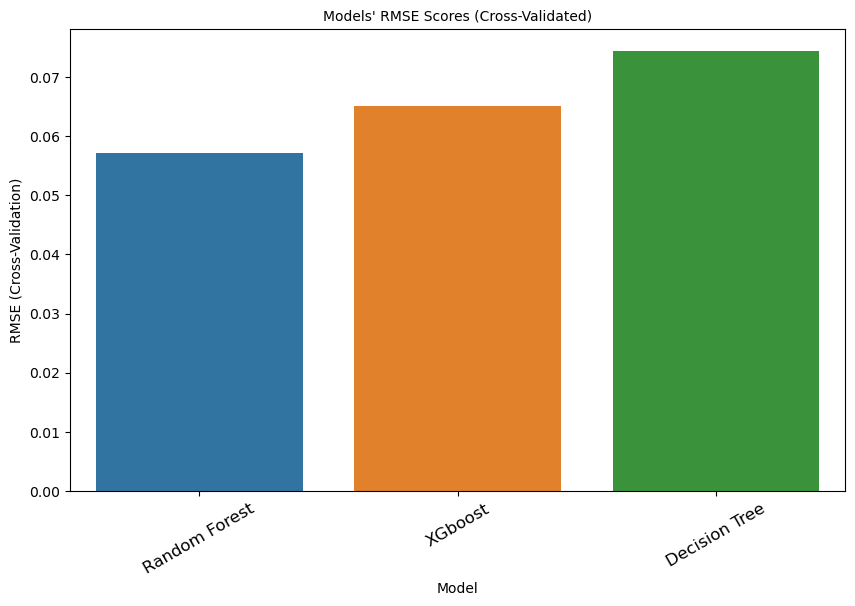

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=10)
plt.xticks(rotation=30, size=12)
plt.show()